In [2]:
import os
cat0_dir = os.path.join('train/cat0')
cat1_dir = os.path.join('train/cat1')
cat2_dir = os.path.join('train/cat2')
cat3_dir = os.path.join('train/cat3')
highlyimpure_dir = os.path.join('train/highlyimpure')



print('total training cat0_dir:', len(os.listdir(cat0_dir)))
print('total training cat1_dir:', len(os.listdir(cat1_dir)))
print('total training cat2_dir:', len(os.listdir(cat2_dir)))
print('total training cat3_dir:', len(os.listdir(cat3_dir)))
print('total training highlyimpure_dir:', len(os.listdir(highlyimpure_dir)))


total training cat0_dir: 273
total training cat1_dir: 589
total training cat2_dir: 560
total training cat3_dir: 974
total training highlyimpure_dir: 465


In [3]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [18]:
TRAINING_DIR = "train"
training_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=15,
                                   vertical_flip=True,
                                   fill_mode='reflect',
                                   data_format='channels_last',
                                   brightness_range=[0.5, 1.5],
                                   
      )

VALIDATION_DIR = "test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)

Found 2861 images belonging to 5 classes.
Found 321 images belonging to 5 classes.


In [19]:

model = tf.keras.models.Sequential([
  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [21]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [23]:
history = model.fit(train_generator, epochs=5, steps_per_epoch=32, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/5
32/32 [==============================] - 7s 230ms/step - loss: 0.3668 - accuracy: 0.8716 - val_loss: 0.4219 - val_accuracy: 0.8542
Epoch 2/5
32/32 [==============================] - 7s 217ms/step - loss: 0.3631 - accuracy: 0.8816 - val_loss: 0.3660 - val_accuracy: 0.8542
Epoch 3/5
32/32 [==============================] - 7s 206ms/step - loss: 0.3589 - accuracy: 0.8567 - val_loss: 0.2522 - val_accuracy: 0.9062
Epoch 4/5
32/32 [==============================] - 7s 223ms/step - loss: 0.3288 - accuracy: 0.8750 - val_loss: 0.2063 - val_accuracy: 0.9271
Epoch 5/5
32/32 [==============================] - 7s 206ms/step - loss: 0.2842 - accuracy: 0.8926 - val_loss: 0.2385 - val_accuracy: 0.8958


In [24]:
model.save("har.h5")

In [30]:
img = image.load_img('test0.jpg',target_size=(150,150,3))
img = image.img_to_array(img)
img = img/255
import numpy as np
import matplotlib.pyplot as plt

cat0 (1.0)
cat1 (0.00012)


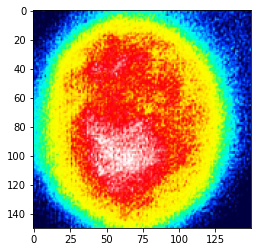

In [32]:
classes = np.array(['cat0','cat1','cat2','cat3','highlyimpure'])
proba = model.predict(img.reshape(1,150,150,3))
top_2 = np.argsort(proba[0])[:-4:-1]
for i in range(2):
    print("{}".format(classes[top_2[i]])+" ({:.2})".format(proba[0][top_2[i]]))
plt.imshow(img)
